# 서울시 구별 cctv/인구분석

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
df = pd.read_csv('서울시_CCTV_인구_병합데이터.csv')
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
종로구,1772,20.49,155106,9077,27605,5.85,17.80
중구,2333,78.98,132259,9243,23980,6.99,18.13
용산구,2383,78.64,240665,14287,38884,5.94,16.16
성동구,3602,46.13,295767,6605,45591,2.23,15.41
광진구,2588,112.29,355306,12825,50815,3.61,14.30


* 상관관계 분석

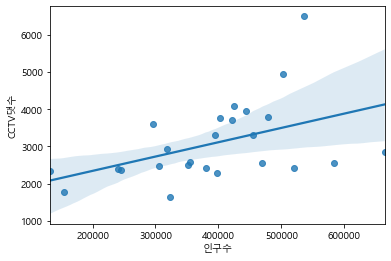

In [5]:
# cctv댓수 
sns.regplot(x='인구수', y='CCTV댓수', data=df)
sns.regplot()
plt.show()

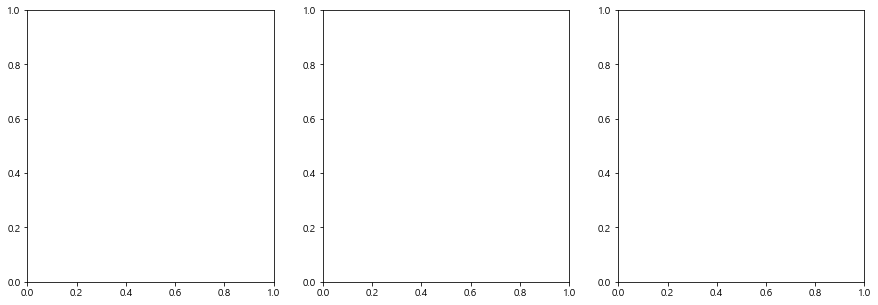

In [10]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
features = ['인구수', '외국인비율', '고령자비율']

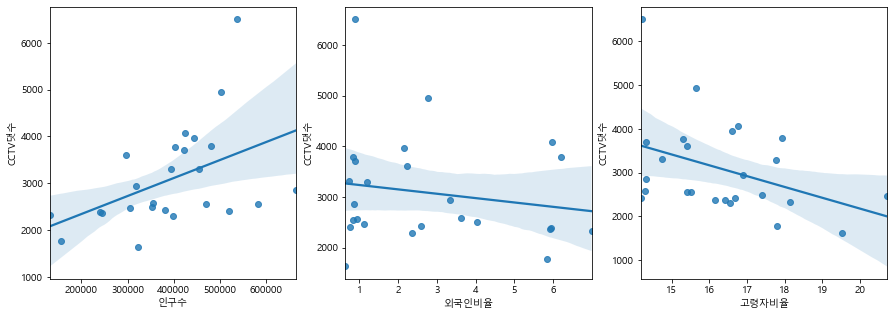

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])

In [ ]:
for i,faature in enumerate(features):
    sns.regplot()

* 구별 cctv 댓수

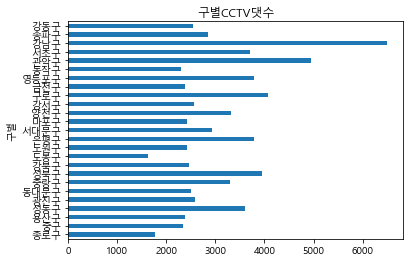

In [14]:
df.CCTV댓수.plot(kind ='barh')
plt.title('구별CCTV댓수')
plt.show()

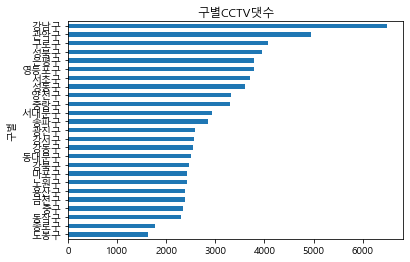

In [16]:
# 미운 바차트를 소팅 하면 어때 ? 
df.CCTV댓수.sort_values().plot(kind ='barh')
plt.title('구별CCTV댓수')
plt.show()

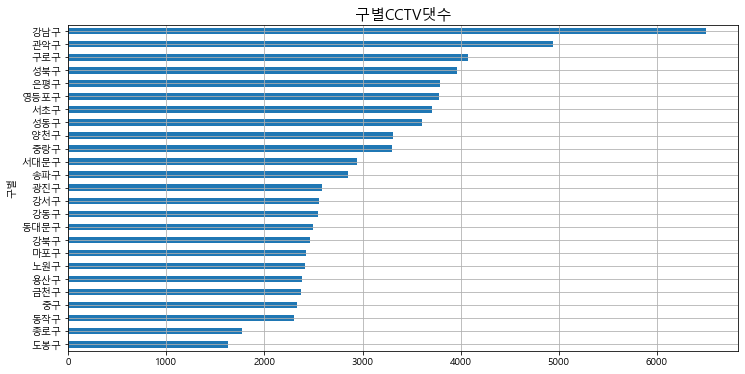

In [18]:
df.CCTV댓수.sort_values().plot(kind ='barh', grid=True, figsize=(12,6))
plt.title('구별CCTV댓수', fontsize=15)
plt.show()
# 막대그래프를 bar 가 아니라 barh 호리젠탈 쓴 이유는 
# 한글 강남구, 관악구 등등 때문이다. 호리젠탈이 레이블을 보여주기가 더 쉽기 때문에

* 인구대비 CCTV비율,  외국인 비율 및 고령자 비율로 확인 안하는 이유는 위 상관관계에서 음의 상관을 보였기 때문인데

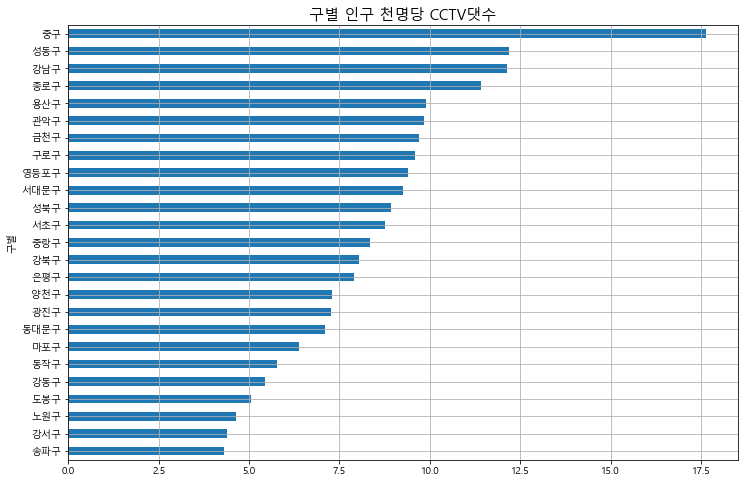

In [30]:
# 그렇다면 인구대비 cctv 비율
df['천명당CCTV'] = (df.CCTV댓수 / df.인구수 * 1000).round(2)
df.천명당CCTV.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 인구 천명당 CCTV댓수', fontsize=15)
plt.show()

# * 인구수와 CCTV 댓수 분석


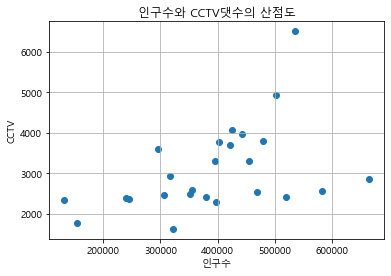

In [31]:
# 산점도(Scatter plot)
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.grid()
plt.title('인구수와 CCTV댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

# 1. 회귀선 추가.

- 회귀선

In [33]:
np.polyfit(df.인구수, df.CCTV댓수, 1)
# 일차식으로 어레이 2개의 값 준다. 앞의 값이 coefficient(계수,기울기) , 뒤의값이  intercept ,절편
# 인공지능에서는 weight , bias 라고 한다.

array([3.85119765e-03, 1.57231514e+03])

In [34]:
weight, bias = np.polyfit(df.인구수, df.CCTV댓수,1)
weight, bias

(0.0038511976508863724, 1572.3151359747483)

In [35]:
xs = np.array([10000, 700000])
ys = weight * xs + bias
ys

array([1610.82711248, 4268.1534916 ])

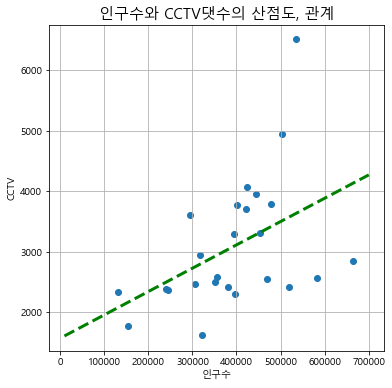

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(xs, ys, 'g--', lw=3)
plt.grid()
plt.title('인구수와 CCTV댓수의 산점도, 관계', fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선과 산점도 사이의 오차 

레시규 잔차 오차 

In [45]:
df['오차'] = abs(df.CCTV댓수 -(df.인구수*weight +bias)).round(2)
df_sort = df.sort_values(by = '오차', ascending=False)
# df_sort


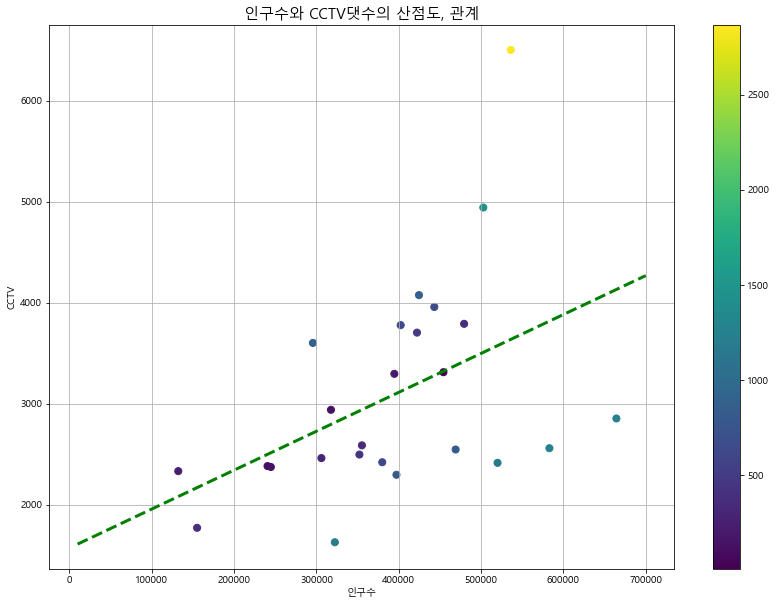

In [52]:
# 컬러옵션 줄거야.


plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50 )
plt.plot(xs, ys, 'g--', lw=3)
plt.grid()
plt.title('인구수와 CCTV댓수의 산점도, 관계', fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()

plt.show()

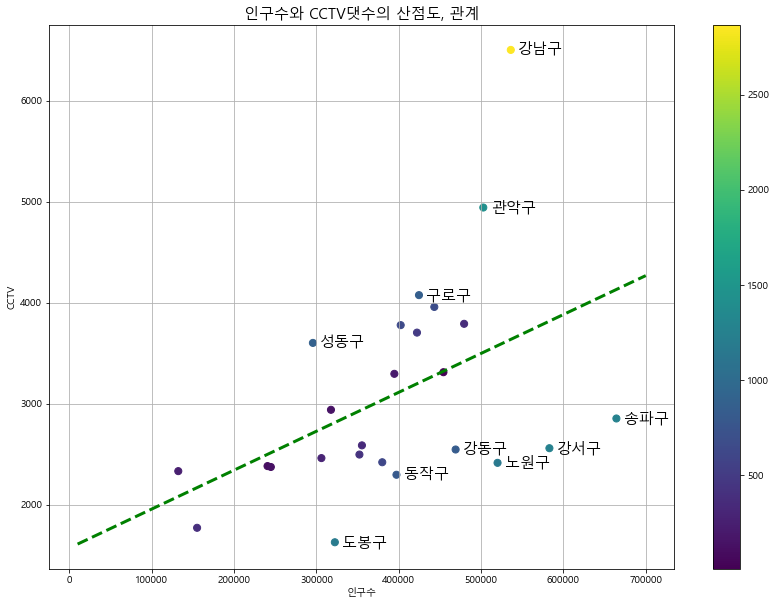

In [61]:
# 최종그림 text까지 포함
# 그림그리는 것 까지는 똑같지만. 구별 값을 줄 것. 송파구 강동구

plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50 )
plt.plot(xs, ys, 'g--', lw=3)
for i in range(10):
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,                    #10000~ 20000쯤은 괜츈
        df_sort.index[i], fontsize=15)
# for i in range(10):
#     plt.text(df_sort.인구수[i], df_sort.CCTV댓수[i],
#         df_sort.index[i], fontsize=15)
plt.grid()
plt.title('인구수와 CCTV댓수의 산점도, 관계', fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()

plt.savefig('서울시_인구수와_CCTV댓수의_관계.png')
# 그림 생성